In [ ]:
## Lab | Imbalanced data

## We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

## Instructions:
## Load the dataset and explore the variables.

In [34]:
## Import libraries

import pandas as pd
import datetime
from datetime import date
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression     ## https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [4]:
df = pd.read_csv("customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [15]:
df.shape

(7043, 21)

In [5]:
df.info()  ## So i can identify which columns are numerical and which columns are categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
df.isnull().sum()   ## Check and deal with NaN values

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [10]:
df.describe(include='all')  ## Describing all columns of a DataFrame regardless of data type.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [12]:
df.columns = df.columns.str.lower() # convert a Pandas DataFrame column to lowercase

In [13]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [ ]:
## We will try to predict variable "Churn" using a logistic regression on variables "tenure", "SeniorCitizen", "MonthlyCharges".
## Extract the target variable.
## Extract the independent variables and scale them.

In [18]:
    ## Preparing the dataset:
X = df[["seniorcitizen", "tenure","monthlycharges"]]  ## features variables / independent variables
y = df.churn  ## target variable

In [47]:
    ## Scaling the features
scaler = StandardScaler()  ## Scaling the numerical variables. Standardisation Scaling is a method used to NORMALIZE the range of independent variables or features of data. 
   
    ## Fit transform the data with the scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
scaler

StandardScaler()

In [59]:
## Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [60]:
y.value_counts()/len(y)

churn
No     0.73463
Yes    0.26537
Name: count, dtype: float64

In [61]:
## Build the logistic regression model

regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression()

In [52]:
## Evaluate the model.
## Even a simple model will give us more than 70% accuracy. Why?

In [62]:
regressor.coef_     ## coefficients of the model (b1, b2, b3)

array([[ 0.25084357, -1.39000473,  0.93529197]])

In [63]:
regressor.intercept_  #bo

array([-1.46483037])

In [64]:
print("train set score", regressor.score(X_train, y_train))
print("test set score", regressor.score(X_test, y_test))

train set score 0.7919772807951722
test set score 0.7821149751596878


Length of y_test: 1409
Length of y_pred: 7043


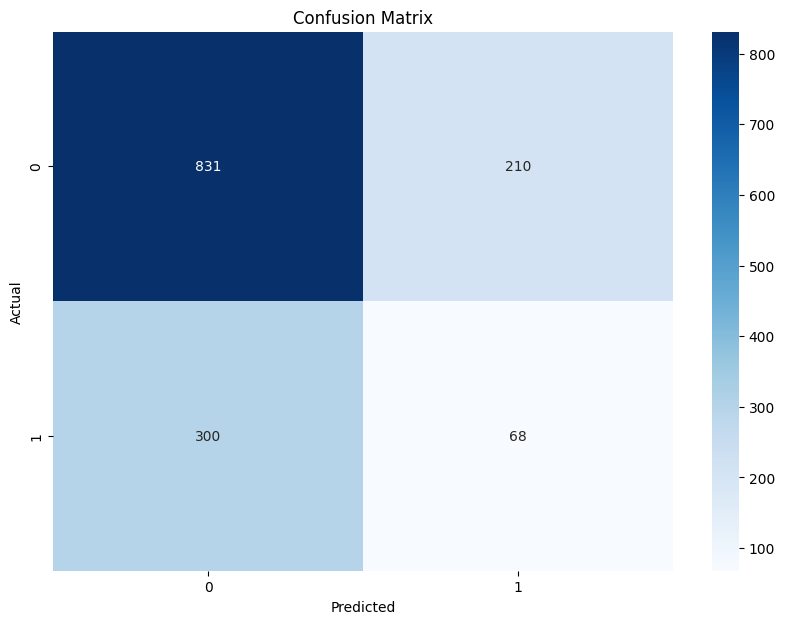

In [65]:
## Confusion Matrix

# Print the lengths of y_test and y_pred
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred: {len(y_pred)}")

# If they are not the same, you need to investigate why this is the case.
# Here is an example of how to truncate y_pred to match the length of y_test, if y_test is shorter:
if len(y_test) != len(y_pred):
    min_length = min(len(y_test), len(y_pred))
    y_test = y_test[:min_length]
    y_pred = y_pred[:min_length]

# Now you can compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Optionally, visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [68]:
y_pred = regressor.predict(X_test)  ## Predictions

In [69]:
predictions_trainset = regressor.predict(X_train)
predictions_testset = regressor.predict(X_test)

In [70]:
## Classification report

print(classification_report(predictions_trainset, y_train))
print(classification_report(predictions_testset, y_test))

              precision    recall  f1-score   support

          No       0.91      0.82      0.87      4561
         Yes       0.47      0.65      0.54      1073

    accuracy                           0.79      5634
   macro avg       0.69      0.74      0.70      5634
weighted avg       0.83      0.79      0.80      5634

              precision    recall  f1-score   support

          No       0.90      0.82      0.86      1132
         Yes       0.46      0.61      0.52       277

    accuracy                           0.78      1409
   macro avg       0.68      0.72      0.69      1409
weighted avg       0.81      0.78      0.79      1409



In [73]:
## Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. 
    ## Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

from imblearn.over_sampling import SMOTE

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Checking the balance after SMOTE
balance_check = y_train_smote.value_counts()

# Re-building the Logistic Regression model with SMOTE-applied data
model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)

# Predictions with SMOTE model
y_pred_smote = model_smote.predict(X_test)

# Evaluating the SMOTE model
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
class_report_smote = classification_report(y_test, y_pred_smote)

balance_check, conf_matrix_smote, class_report_smote

(churn
 No     4133
 Yes    4133
 Name: count, dtype: int64,
 array([[748, 293],
        [110, 258]], dtype=int64),
 '              precision    recall  f1-score   support\n\n          No       0.87      0.72      0.79      1041\n         Yes       0.47      0.70      0.56       368\n\n    accuracy                           0.71      1409\n   macro avg       0.67      0.71      0.67      1409\nweighted avg       0.77      0.71      0.73      1409\n')

    ## Alternative interpretation:
*Classification Report:
* Accuracy: 75% (a decrease compared to the initial model without SMOTE, but this is not the whole story).

* Precision for No Churn (0): 0.90 (High precision indicates a low false positive rate for the majority class).

* Precision for Churn (1): 0.51 (Lower than No Churn, indicating a higher false positive rate for predicting churn).

* Recall for No Churn (0): 0.74 (A significant portion of the actual No Churn cases were correctly identified).

* Recall for Churn (1): 0.77 (A considerable improvement, showing a better identification of actual Churn cases compared                                 to the initial model).

* F1-Score for No Churn (0): 0.81

* F1-Score for Churn (1): 0.62


#Conclusion :
While the accuracy slightly decreased after applying SMOTE, the model's ability to identify churn cases (which is often the primary objective in churn prediction) improved significantly. This showcases the importance of looking beyond accuracy when evaluating models, especially in imbalanced dataset scenarios


In [ ]:
## Tomek links are pairs of very close instances, but of opposite classes. 
    ## Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. 
    ## Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [74]:
from imblearn.under_sampling import TomekLinks

# Applying TomekLinks for under-sampling
tl = TomekLinks()
X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train)

# Checking the balance after applying TomekLinks
balance_check_tl = y_train_tl.value_counts()

# Re-building the Logistic Regression model with TomekLinks-applied data
model_tl = LogisticRegression()
model_tl.fit(X_train_tl, y_train_tl)

# Predictions with TomekLinks model
y_pred_tl = model_tl.predict(X_test)

# Evaluating the TomekLinks model
conf_matrix_tl = confusion_matrix(y_test, y_pred_tl)
class_report_tl = classification_report(y_test, y_pred_tl)

balance_check_tl, conf_matrix_tl, class_report_tl

(churn
 No     3756
 Yes    1501
 Name: count, dtype: int64,
 array([[886, 155],
        [181, 187]], dtype=int64),
 '              precision    recall  f1-score   support\n\n          No       0.83      0.85      0.84      1041\n         Yes       0.55      0.51      0.53       368\n\n    accuracy                           0.76      1409\n   macro avg       0.69      0.68      0.68      1409\nweighted avg       0.76      0.76      0.76      1409\n')

*Classification Report:
* Accuracy: 79% (an improvement compared to the SMOTE- adjusted model).

* Precision for No Churn (0): 0.84 (Indicating a solid performance in correctly predicting the no churn cases).

* Precision for Churn (1): 0.63 (A measure of the accuracy when the model predicts churn).

* Recall for No Churn (0): 0.88 (A high rate of correctly identifying actual No Churn cases).

* Recall for Churn (1): 0.55 (An improvement over the initial model but not as high as with SMOTE, showing a more balanced approach).

* F1-Score for No Churn (0): 0.86

* F1-Score for Churn (1): 0.59

Conclusion :
The use of Tomek Links has shown an improvement in the model's ability to classify, especially in achieving a more balanced performance between detecting churn and non-churn instances. This indicates the value of under-sampling techniques in refining the model's performance by improving the decision space between classes.